#### spam_classification

Building a spam classifier involves training a model to distinguish between spam and non-spam (ham) emails based on some features.


IMPORTING LIBRARIES:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import nltk

# Data Collection:

In [6]:
DATA=pd.read_csv("dataset/spam.csv",encoding='latin-1')
DATA.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing

In [7]:
DATA.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)


In [8]:
DATA=DATA.rename(columns={"v1":"TYPE","v2":"EMAIL"})
DATA.head()

,TYPE,EMAIL
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
DATA.describe()

,TYPE,EMAIL
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
DATA.isnull().sum(axis=0)

TYPE     0
EMAIL    0
dtype: int64

In [11]:
number_of_occurence=DATA['TYPE'].value_counts()
number_of_occurence

TYPE
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
types=number_of_occurence.index
times=number_of_occurence.values


Text(0.5, 1.0, 'number on each type of emails')

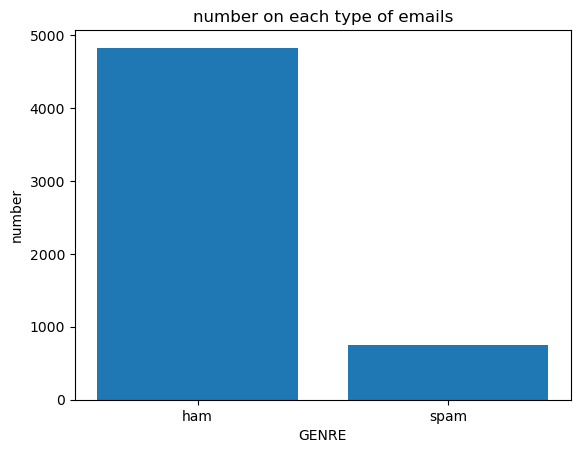

In [13]:
plt.bar(types, times)
plt.xlabel("GENRE")
plt.ylabel("number")
plt.title('number on each type of emails')


# Feature Extraction

In [14]:
nltk.download('stopwords')
DATA['EMAIL']=DATA['EMAIL'].str.lower().str.replace('[{}]'.format(string.punctuation), '')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words=set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    tokens=word_tokenize(text)
    filtred_tokens=[word for word in tokens if word.isalnum and word not in stop_words]
    stemmed_token=[stemmer.stem(word)for word in filtred_tokens]
    preprocessed_text=' '.join(stemmed_token)
    return preprocessed_text

DATA['TYPE']=DATA['TYPE'].apply(clean_text)
DATA.head()


,TYPE,EMAIL
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [16]:
Classes={'spam':1, 'ham':0}

DATA['TYPE'] = DATA['TYPE'].replace(Classes)
DATA.head()

,TYPE,EMAIL
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [17]:
DATA.drop_duplicates()

,TYPE,EMAIL
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ì_ b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
features = count_vectorizer.fit_transform(DATA['EMAIL'])
features = features.toarray()


# Split the Data

In [19]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(features,DATA["TYPE"],test_size=0.2,random_state=42)

# Model Selection
# Model Training
# Model Training

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

classifer = MultinomialNB()
classifer.fit(X_train, Y_train)
predections=classifer.predict(X_test)
predections


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
Y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
4264    0
2439    0
5556    0
4205    0
4293    1
Name: TYPE, Length: 1115, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score, classification_report

accuracy1=accuracy_score(predections,Y_test)
accuracy1


0.9811659192825112

In [23]:
report = classification_report(Y_test,predections)
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.94      0.92      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Model Selection:we can use logistic regression
 Model Training
 Model Training

In [24]:
from sklearn.linear_model import LogisticRegression

classifer2=LogisticRegression()
classifer2.fit(X_train,Y_train)
predictions2=classifer2.predict(X_test)

In [25]:
accuracy2=accuracy_score(predictions2,Y_test)
accuracy2

0.9766816143497757

In [26]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions2)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [28]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [29]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [30]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [31]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [51]:
from sklearn.metrics import accuracy_score

pred_scores = []

for k, v in clfs.items():
    train_classifier(v, X_train, Y_train)
    pred = predict_labels(v, X_test)
    acc_score = accuracy_score(Y_test, pred)  # Fix here
    pred_scores.append((k, acc_score))


In [53]:
pred_scores

[('SVC', 0.8466367713004485),
 ('KN', 0.8654708520179372),
 ('NB', 0.9829596412556054),
 ('DT', 0.9748878923766816),
 ('LR', 0.9748878923766816),
 ('RF', 0.97847533632287),
 ('AdaBoost', 0.9721973094170404),
 ('BgC', 0.968609865470852),
 ('ETC', 0.9802690582959641)]

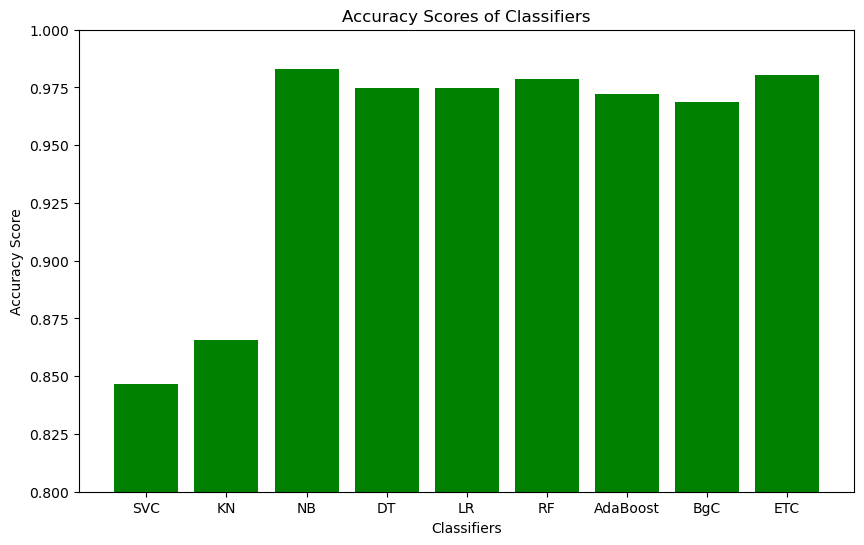

In [60]:
classifier_names, accuracy_scores = zip(*pred_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores, color='green')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classifiers')
plt.ylim(0.8 ,1)  # Set the y-axis limits between 0 and 1 for accuracy score
plt.show()